Importing Necessary libraries

In [67]:
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score
import random


In [68]:

# Importing the dataset

data=pd.read_csv("IOT_Assignment_2_data_regression_sensor_range.csv")
X=data[["Humidity(%)","Temperature(°C)"]]
y=data[["WaterFlow(%)"]]


In [69]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)


In [ ]:

# Dictionary to store hyper parameters as key and its corresponding mean absolute error as value
optim_param={}

In [ ]:

# Trying with batch size 16 and 32
batch=[16,32]

# Trying with epotch - 1000,2000
epo=[1000,2000]

# Trying with number of neurons at layer 1 = 6,7,8,9,10
for n1 in range(6,11):
    
    # Trying with number of neurons at layer 2 = 6,7,8,9,10
    for n2 in range(6,11):
        
        # Initialising the ANN
        model = Sequential()

        # Adding the input layer and the first hidden layer
        model.add(Dense(units = n1, activation = 'relu', input_dim = 2))

        # Adding the second hidden layer
        model.add(Dense(units = n2, activation = 'relu'))

        # Adding the output layer
        model.add(Dense(units = 1))

        # Compiling the ANN
        opt = Adam(learning_rate=0.001)
        model.compile(optimizer = opt, loss = 'mae',metrics=['mae'])

        # Fitting the ANN to the Training set

        for b_size in batch:
            for ep in epo:
                history=model.fit(X_train, y_train,validation_data=(X_test, y_test),batch_size = b_size,epochs=ep)
                optim_param[(n1,n2,b_size,ep)]=history.history['mae'][-1]
    

In [ ]:
optim_param

In [ ]:
sorted(optim_param.items(),key=lambda x:x[1],reverse=True)

From above results we got some combinations with good results, so now trying with that combinations.

In [ ]:
# Dictionary to store hyper parameters as key and its corresponding mean absolute error as value

final_param={}

In [ ]:
# Trying this combination of (n1,n2)
neurons=[(5,5),(6,8),(7,9),(2,3),(4,5),(8,10)]

# Trying with epotch - 1000,2000
epo=[1000,2000]

for item in neurons:        
      # Initialising the ANN
      model = Sequential()

      # Adding the input layer and the first hidden layer
      model.add(Dense(units = item[0], activation = 'relu', input_dim = 2))

      # Adding the second hidden layer
      model.add(Dense(units = item[1], activation = 'relu'))

      # Adding the output layer
      model.add(Dense(units = 1))

      # Compiling the ANN
      opt = Adam(learning_rate=0.001)
      model.compile(optimizer = opt, loss = 'mae',metrics=['mae'])

      # Fitting the ANN to the Training set

      for ep in epo:
          history=model.fit(X_train, y_train,validation_data=(X_test, y_test),batch_size =32,epochs=ep)
          final_param[(item[0],item[1],ep)]=history.history['mae'][-1]
    

In [ ]:
final_param

{(2, 3, 1000): 26.96527099609375,
 (2, 3, 2000): 26.9652042388916,
 (4, 5, 1000): 26.96524429321289,
 (4, 5, 2000): 26.9652156829834,
 (5, 5, 1000): 26.965240478515625,
 (5, 5, 2000): 26.965219497680664,
 (6, 8, 1000): 12.388099670410156,
 (6, 8, 2000): 11.841711044311523,
 (7, 9, 1000): 12.205471992492676,
 (7, 9, 2000): 11.095603942871094,
 (8, 10, 1000): 12.096131324768066,
 (8, 10, 2000): 11.601614952087402}

From above operation we found that 

*   Number of neurons at Layer1=7 
*   Number of neurons at Layer2=9 
*   Epoch=2000 
*   Batch size=32

is the best combination.So training model on this parameters.

In [71]:
# initializer - used to reproduce same model
# seed = 1 

In [59]:
initializer = tf.keras.initializers.GlorotNormal(1)

model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units = 7, activation = 'relu', input_dim = 2,kernel_initializer=initializer))

# Adding the second hidden layer
model.add(Dense(units = 9, activation = 'relu',kernel_initializer=initializer))

# Adding the output layer
model.add(Dense(units = 1,kernel_initializer=initializer))

# Compiling the ANN
opt = Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss = 'mae',metrics=['mae'])

# Fitting the ANN to the Training set
history=model.fit(X_train, y_train,validation_data=(X_test, y_test),batch_size =32,epochs=2000)
    

Epoch 1/2000
5/5 [==============================] - 0s 37ms/step - loss: 28.5375 - mae: 28.5375 - val_loss: 20.7294 - val_mae: 20.7294
Epoch 2/2000
5/5 [==============================] - 0s 6ms/step - loss: 28.2103 - mae: 28.2103 - val_loss: 20.5121 - val_mae: 20.5121
Epoch 3/2000
5/5 [==============================] - 0s 7ms/step - loss: 27.9510 - mae: 27.9510 - val_loss: 20.3847 - val_mae: 20.3847
Epoch 4/2000
5/5 [==============================] - 0s 7ms/step - loss: 27.7411 - mae: 27.7411 - val_loss: 20.3613 - val_mae: 20.3613
Epoch 5/2000
5/5 [==============================] - 0s 7ms/step - loss: 27.5717 - mae: 27.5717 - val_loss: 20.3494 - val_mae: 20.3494
Epoch 6/2000
5/5 [==============================] - 0s 7ms/step - loss: 27.4502 - mae: 27.4502 - val_loss: 20.3371 - val_mae: 20.3371
Epoch 7/2000
5/5 [==============================] - 0s 7ms/step - loss: 27.3913 - mae: 27.3913 - val_loss: 20.3149 - val_mae: 20.3149
Epoch 8/2000
5/5 [==============================] - 0s 7ms/st

In [60]:
# Evaluate model 
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 5.5493 - mae: 5.5493


[5.549330711364746, 5.549330711364746]

Converting dataframe into numpy array

In [61]:
type(y_test)

numpy.ndarray

In [62]:
y_test=np.array(y_test)

Plotting graph for Real data vs Predicted data

<class 'numpy.ndarray'>


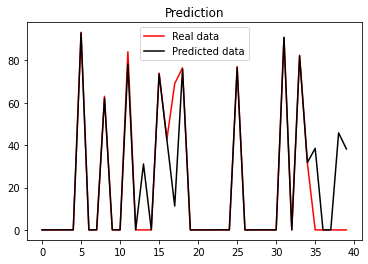

In [63]:
y_pred = model.predict(X_test)
print(type(y_pred))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'black', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

Plotting graph for 

1.   Training & Validation Accuracy vs Epochs
2.   Training & Validation Loss vs Epochs


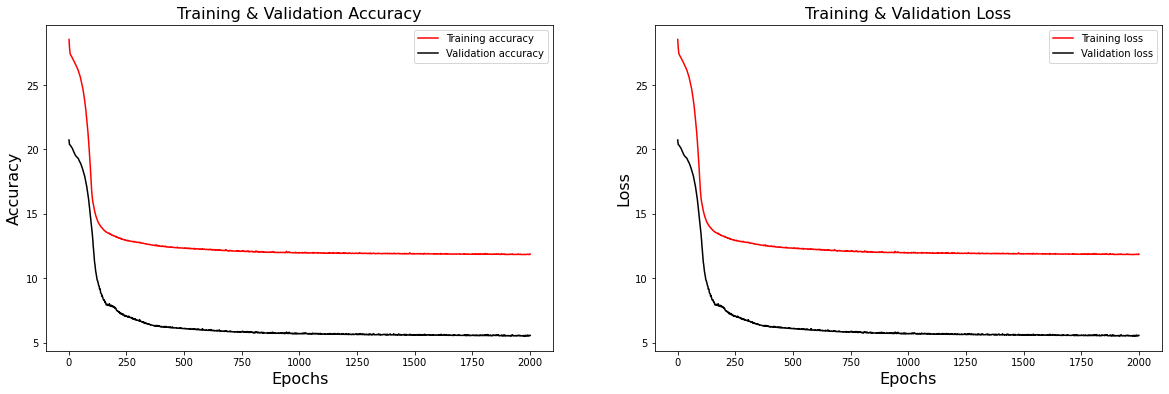

In [64]:
# For mae

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['mae']
val_accuracy = history_dict['val_mae']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Plot the model accuracy (MAE) vs Epochs

ax[0].plot(epochs, accuracy, 'b', label='Training accuracy',color="red")
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy',color="black")
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()

# Plot the loss vs Epochs

ax[1].plot(epochs, loss_values, 'b', label='Training loss',color="red")
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss',color="black")
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

Comparing Predicted data with Real data

In [65]:
for i in range(len(y_pred)):
    print("Prediction =",max([0.],y_pred[i]),"Actual =" ,y_test[i])

Prediction = [0.03841799] Actual = [0.]
Prediction = [0.01868302] Actual = [0.]
Prediction = [0.0450744] Actual = [0.]
Prediction = [0.03529042] Actual = [0.]
Prediction = [0.06111997] Actual = [0.]
Prediction = [92.98658] Actual = [93.33284888]
Prediction = [0.02401417] Actual = [0.]
Prediction = [0.0525133] Actual = [0.]
Prediction = [62.170017] Actual = [63.07122956]
Prediction = [0.06411785] Actual = [0.]
Prediction = [0.01072514] Actual = [0.]
Prediction = [78.290886] Actual = [84.10493782]
Prediction = [0.01070911] Actual = [0.]
Prediction = [31.125204] Actual = [0.]
Prediction = [0.07329285] Actual = [0.]
Prediction = [73.679474] Actual = [73.99971561]
Prediction = [42.502697] Actual = [42.85647607]
Prediction = [11.26111] Actual = [69.07089942]
Prediction = [75.84706] Actual = [76.51493959]
Prediction = [0.02389544] Actual = [0.]
Prediction = [0.01204658] Actual = [0.]
Prediction = [0.00678778] Actual = [0.]
Prediction = [0.03256047] Actual = [0.]
Prediction = [0.05975199] Actu

Checking R2 score of our model

In [66]:
r2_score(y_test,model.predict(X_test))

0.7879418821802172

Since model is working well so now, extracting weights and biases from model for implementing the forward pass in the Simulator.

In [72]:
model.weights

[<tf.Variable 'dense_21/kernel:0' shape=(2, 7) dtype=float32, numpy=
 array([[-0.4151496 , -0.26421493,  0.3135231 , -1.2521678 , -0.48760554,
         -0.61379135,  0.5947052 ],
        [ 0.44373405, -0.00803267, -0.7766129 ,  0.93123084, -0.73851335,
          0.18878712,  0.47466454]], dtype=float32)>,
 <tf.Variable 'dense_21/bias:0' shape=(7,) dtype=float32, numpy=
 array([-3.2539866 ,  0.        , -0.02472453, -3.6391356 ,  0.        ,
         1.6801617 ,  2.4059265 ], dtype=float32)>,
 <tf.Variable 'dense_22/kernel:0' shape=(7, 9) dtype=float32, numpy=
 array([[ 0.5849904 , -0.19816121, -0.4910823 , -0.31706598, -0.3657042 ,
         -0.27402547, -0.1582511 ,  0.53360426,  0.4281763 ],
        [-0.56390417,  0.6891103 , -0.55388504,  0.15042147,  0.2743768 ,
         -0.08655491, -0.2097642 , -0.06703684, -0.2367927 ],
        [-0.00353913, -0.08639619,  0.10100517,  0.02635749, -0.0724325 ,
          0.47995248,  0.2948826 ,  0.40263915,  0.08876697],
        [ 0.9448879 ,  0.0

For regression model-

$Y_{predicted}=W^T.X+b$

So need to find transpose of weights for implementing forward pass(matrix multiplication).

In [73]:
w1=np.array([[-0.4151496 , -0.26421493,  0.3135231 , -1.2521678 , -0.48760554,
         -0.61379135,  0.5947052 ],
        [ 0.44373405, -0.00803267, -0.7766129 ,  0.93123084, -0.73851335,
          0.18878712,  0.47466454]])

In [74]:
w1_T=w1.T

In [75]:
# w1 Transpose
w1_T

array([[-0.4151496 ,  0.44373405],
       [-0.26421493, -0.00803267],
       [ 0.3135231 , -0.7766129 ],
       [-1.2521678 ,  0.93123084],
       [-0.48760554, -0.73851335],
       [-0.61379135,  0.18878712],
       [ 0.5947052 ,  0.47466454]])

In [78]:
bias1=np.array([-3.2539866 , 0.0 , -0.02472453, -3.6391356 , 0.0 , 1.6801617 , 2.4059265])

In [79]:
w2=np.array([[ 0.5849904 , -0.19816121, -0.4910823 , -0.31706598, -0.3657042 ,
         -0.27402547, -0.1582511 ,  0.53360426,  0.4281763 ],
        [-0.56390417,  0.6891103 , -0.55388504,  0.15042147,  0.2743768 ,
         -0.08655491, -0.2097642 , -0.06703684, -0.2367927 ],
        [-0.00353913, -0.08639619,  0.10100517,  0.02635749, -0.0724325 ,
          0.47995248,  0.2948826 ,  0.40263915,  0.08876697],
        [ 0.9448879 ,  0.01231049, -1.2018261 , -0.06614713,  0.00811482,
          0.0701426 , -0.9309507 ,  0.40564016,  0.5428177 ],
        [-0.4239326 , -0.34418222, -0.23520783, -0.4604447 ,  0.6523544 ,
          0.06492429,  0.21805646,  0.62056464,  0.29087767],
        [-1.0454929 ,  0.3016038 , -0.28672296,  0.16849387, -0.1565325 ,
          0.03756765, -1.4061453 , -1.3094757 , -1.3731613 ],
        [-0.2022129 , -0.18989314,  0.27644405, -0.21372734, -0.49845544,
         -0.00212658,  0.62326103,  0.33012542,  0.76410127]])

In [80]:
w2_T=w2.T

In [81]:
# w2 Transpose
w2_T

array([[ 0.5849904 , -0.56390417, -0.00353913,  0.9448879 , -0.4239326 ,
        -1.0454929 , -0.2022129 ],
       [-0.19816121,  0.6891103 , -0.08639619,  0.01231049, -0.34418222,
         0.3016038 , -0.18989314],
       [-0.4910823 , -0.55388504,  0.10100517, -1.2018261 , -0.23520783,
        -0.28672296,  0.27644405],
       [-0.31706598,  0.15042147,  0.02635749, -0.06614713, -0.4604447 ,
         0.16849387, -0.21372734],
       [-0.3657042 ,  0.2743768 , -0.0724325 ,  0.00811482,  0.6523544 ,
        -0.1565325 , -0.49845544],
       [-0.27402547, -0.08655491,  0.47995248,  0.0701426 ,  0.06492429,
         0.03756765, -0.00212658],
       [-0.1582511 , -0.2097642 ,  0.2948826 , -0.9309507 ,  0.21805646,
        -1.4061453 ,  0.62326103],
       [ 0.53360426, -0.06703684,  0.40263915,  0.40564016,  0.62056464,
        -1.3094757 ,  0.33012542],
       [ 0.4281763 , -0.2367927 ,  0.08876697,  0.5428177 ,  0.29087767,
        -1.3731613 ,  0.76410127]])

In [82]:
bias2=np.array([-3.0668378 , 0.0 , 1.8701594 , 0.0 , 0.0 , -0.01298803,  0.58112186, -0.93002635, -1.089445  ])

In [83]:
w3=np.array([[ 0.90990716],
        [-0.2506563 ],
        [ 1.1351497 ],
        [-0.40106028],
        [-0.46258327],
        [-0.0830033 ],
        [-1.0956517 ],
        [ 0.5047472 ],
        [ 0.26671278]])

In [84]:
w3_T=w3.T

In [85]:
# w3 Transpose
w3_T

array([[ 0.90990716, -0.2506563 ,  1.1351497 , -0.40106028, -0.46258327,
        -0.0830033 , -1.0956517 ,  0.5047472 ,  0.26671278]])

In [86]:
bias3=np.array([-0.7577006])

Feeding this weights and biases in simulator.